In [1]:
# Adapted From https://www.kaggle.com/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia

import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pillow
!{sys.executable} -m pip install plaidml-keras  # For Mac GPUs only
!{sys.executable} -m pip install sklearn
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
# os.environ['KERAS_BACKEND'] = 'plaidml.keras.backend'
from PIL import Image
print(os.listdir("./data"))

# Keras Libraries
import plaidml.keras  # For Mac GPUs only
plaidml.keras.install_backend()  # For Mac GPUs only
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['.DS_Store', 'chest_xray']


OSError: dlopen(/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/libplaidml.dylib, 6): image not found

In [4]:
mainDIR = os.listdir('./data/chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [5]:
train_folder = './data/chest_xray/train/'
val_folder = './data/chest_xray/val/'
test_folder = './data/chest_xray/test/'

In [6]:
print(os.listdir(train_folder))
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

['.DS_Store', 'PNEUMONIA', 'NORMAL']


1342
Normal Picture Name:  NORMAL2-IM-0587-0001-0002.jpeg
Pneumonia Picture Name:  person438_bacteria_1889.jpeg


Text(0.5, 1.0, 'Pneumonia Lungs')

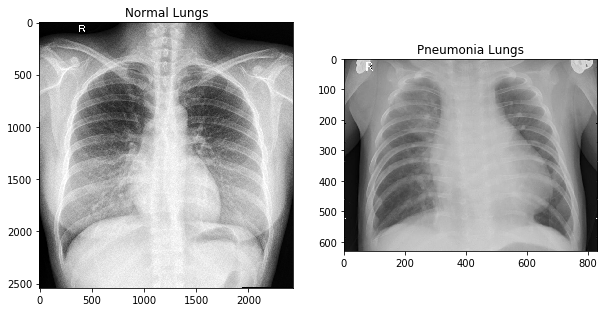

In [7]:
# Normal Picture
print(len(os.listdir(train_n)))
rand_index = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_index]
print('Normal Picture Name: ', norm_pic)

norm_pic_address = train_n+norm_pic

# Pneumonia Picture
rand_index = np.random.randint(0, len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_index]
print('Pneumonia Picture Name: ', sic_pic)

sic_pic_address = train_p+sic_pic

# Loading Images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_pic_address)

# Plotting Random Two Images
f = plt.figure(figsize = (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal Lungs')

a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia Lungs')

In [8]:
cnn = Sequential()

# Convolutional Layer
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))

# Pooling Layer
cnn.add(MaxPooling2D(pool_size = (2,2)))

# 2nd Convolutional Layer
cnn.add(Conv2D(32, (3,3), activation='relu'))

# 2nd Pooling Layer
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Flatten Layers
cnn.add(Flatten())

#Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

INFO:plaidml:Opening device "metal_amd_radeon_pro_560.0"


In [9]:
# Fit CNN to Images

# Training image normalization settings
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Test/Validation image normalization settings
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [11]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 379s 2s/step - loss: 0.3497 - acc: 0.8507 - val_loss: 0.3118 - val_acc: 0.8125
Epoch 2/10
163/163 [==============================] - 210s 1s/step - loss: 0.2381 - acc: 0.9009 - val_loss: 1.1660 - val_acc: 0.5625
Epoch 3/10
163/163 [==============================] - 208s 1s/step - loss: 0.2154 - acc: 0.9110 - val_loss: 0.3180 - val_acc: 0.7500
Epoch 4/10
163/163 [==============================] - 212s 1s/step - loss: 0.1889 - acc: 0.9239 - val_loss: 0.3009 - val_acc: 0.8750
Epoch 5/10
163/163 [==============================] - 208s 1s/step - loss: 0.1694 - acc: 0.9298 - val_loss: 0.3415 - val_acc: 0.7500
Epoch 6/10
163/163 [==============================] - 210s 1s/step - loss: 0.1619 - acc: 0.9360 - val_loss: 0.4660 - val_acc: 0.6875
Epoch 7/10
163/163 [==============================] - 210s 1s/step - loss: 0.1656 - acc: 0.9363 - val_loss: 0.6878 - val_acc: 0.6875
Epoch 8/10
163/163 [==============================] - 210s 1s/step - 

In [12]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [13]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 88.92769104354971 %


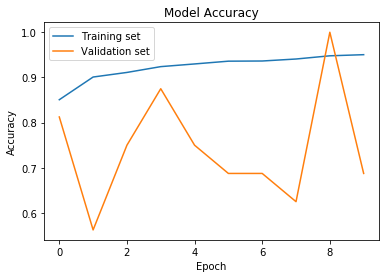

In [14]:
plt.plot(cnn_model.history['acc'])
plt.plot(cnn_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

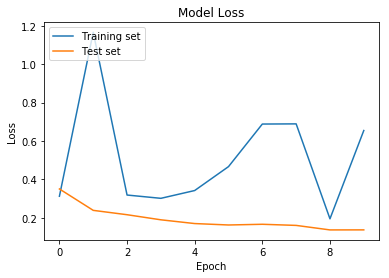

In [15]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [19]:
from keras.models import load_model

cnn.save('cnn_pneumonia_model.h5')

In [40]:
# Attempting to generate confusion matrix
Y_pred = cnn.predict_generator(test_set)

In [48]:
print(np.argmax(Y_pred, axis=1))
print(Y_pred)

[0 0 0 ... 0 0 0]
[[0.09232862]
 [0.87679553]
 [0.9993369 ]
 ...
 [0.9937767 ]
 [0.9998554 ]
 [0.9994616 ]]


In [41]:
y_pred = np.argmax(Y_pred, axis=1)
real_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
cm1 = confusion_matrix(real_classes, y_pred)
print(cm1)
print('Classification Report')
target_names = ['NORMAL', 'PNEUMONIA']
print(classification_report(test_set.classes, y_pred, target_names=target_names))
print(test_set.class_indices)
print(Y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [624, 19472]

In [21]:
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Pneumonia']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [16, 9984]